<a href="https://colab.research.google.com/github/ssuzana/Machine-Learning-Notebooks/blob/main/Multiclass_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

We will be using the MNIST dataset, which is a set of small images of handwritten digits. Each image is labeled with the digit it represents.

`Scikit-Learn` provides helper functions to download popular datasets and MNIST is one of them.



# Imports

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

# Get and explore the data


In [ ]:
# fetch_openml() started returning Pandas DataFrames instead of NumPy arrays since Scikit-Learn 0.24.
# include as_frame=False to get NumPy arrays
mnist = fetch_openml('mnist_784', parser='auto', as_frame=False)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# get the description of the dataset
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
X, y = mnist['data'], mnist['target']

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape


(70000,)

 There are 70000 images and each image has 784 (each image is 28 X 28 pixels). Each feature represents one pixel's intensity, from 0 (white) to 255 (black).  

# Display one digit from the dataset

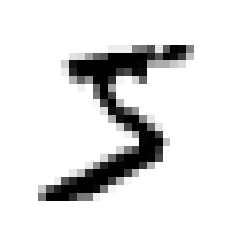

In [ ]:
# code if as_frame=False is not set when getting the data with fetch_openml() 
# digit = X.loc()
# digit_image = digit.values.reshape(28, 28)
digit = X[0]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [ ]:
y[0]

'5'

In [ ]:
# cast y to integer
y = y.astype(np.uint8)

# Split the data into `train` and `test` 

The MNIST dataset is already split into a training set (the first 60000 images) and a test set (the last 10000 images). Also, the training set is already shuffled.


In [ ]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000],y[60000:]

# Multiclass classification

Binary classifiers (such as Logistic Regression or Support Vector Machine classifiers) can distinguish between two classes and multiclass classifiers can distinguish between more than two classes (such as Stochastic Gradient Descent (SGD) classifiers, Random forest classifiers, and naive Bayes classifiers).

However, there are various strategies that you can use to perform multiclass classification with multiple binary classifiers:

* `one-versus-the-rest (OvR)` strategy, also called `one-versus-all`

 To create a system that can classify the digit images into 10 classes (from 0 to 9) you can train 10 binary classifiers, one for each digit.
 When you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classfier outputs the highest score.

* `one-versus-one (OvO)` strategy

 Train a binary classifier for each pair of digits: one to distinguish between 0s and 1s, another to distinguish 0s and 2s, and so on. If there are `N` classes, you need to train `N(N-1)/2` classifiers. For the MNIST problem, this means training 45 binary classifiers. To classify an image, you have to run the image through all 45 classifiers and see which class winds the most duels. 

 The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.
Some algorithms (such as SVM classifiers) scale poorly with the size of the training set. For these algorithms OvO is preferred because it is faster to train many classifiers on small training sets than to train a few classifiers on large training sets. For most binary classification algorithms, however, OvR is preferred.



In [ ]:
# use a Support Vector Machine classifier
from sklearn.svm import SVC
# SVMs do not scale well to large datasets, so let's only train on the first 2,000 instances, 
# or else this section will take a very long time to run:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  

SVC(random_state=42)

In [ ]:
svm_clf.predict([digit])

array([5], dtype=uint8)

Scikit-Learn detects when you try to use a binary classification algorithm
for a multiclass classification task, and it automatically runs OvR or OvO,
depending on the algorithm. 

For this classification task, Scikit-Learn actually used the OvO strategy:
it trained 45 binary classifiers, got their decision scores for the image, and
selected the class that won the most duels.

In [ ]:
# get the 10 decision scores
digit_scores = svm_clf.decision_function([digit])
digit_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [ ]:
# the highest score corresponds to the predicted class '5'
np.argmax(digit_scores)

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

To force Scikit-Learn to use one-versus-one or one-versus-the-rest,
you can use the `OneVsOneClassifier` or `OneVsRestClassifier`
classes. Simply create an instance and pass a classifier to its constructor
(it does not even have to be a binary classifier).

In [ ]:
# create a multiclass classifier using the OvR strategy, based on an SVC

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([digit])

array([5], dtype=uint8)

In [ ]:
# use SGDClassifier 
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([digit])

array([3], dtype=uint8)

In [ ]:
sgd_clf.decision_function([digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
# use the cross_val_score() function to evaluate the SGDClassifier’s accuracy

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Note that the accuracy is over 85% on all test folds. We can do better by scaling the inputs.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy" )

array([0.8983, 0.891 , 0.9018])

# Error Analysis - Confusion matrix

Warning: the following cell will take a few minutes to run:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

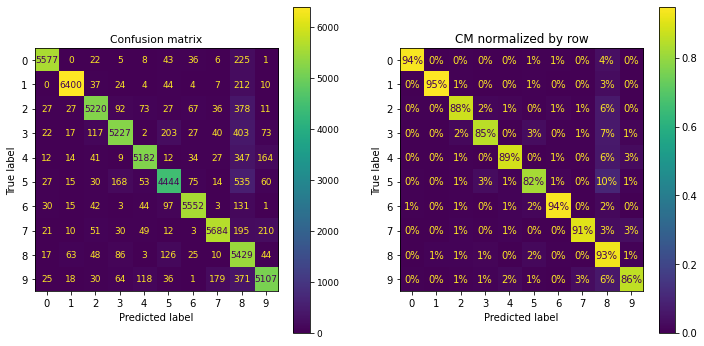

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")

plt.show()

Rows represent actual classes, while columns represent predicted classes. 
Most images are on the main diagonal, which means they were classified correctly.

# Reference

*Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition by Aurélien Géron.